## Definição do Problema

A empresa Zesk Inc coletou dados do ano anterior com diversos atributos de funcionários de todos os setores. O objetivo é estudar a relação desses atributos e o impacto na promoção dos funcionários. Esse trabalho de análise pode ser usado mais tarde para construir modelos de Machine Learning para prever se um colaborador será ou não promovido.

Essas são as perguntas que devem ser respondidas:

- Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?
- Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?
- Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?
- Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?
- Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?
- Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?
- Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

Seu trabalho é limpar e preparar os dados e então construir um dashboard no Power BI para apresentar seus resultados.

## Carregando e Instalando Pacotes

In [4]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da linguagem Python usada neste Notebook:', python_version())

Versão da linguagem Python usada neste Notebook: 3.9.15


In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
# Versões dos pacotes usados neste jupyter notebook
    #Instalação do watermark
    #!pip install watermark
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.6.2
sys       : 3.9.15 (main, Nov  4 2022, 16:35:55) [MSC v.1916 64 bit (AMD64)]
numpy     : 1.23.3
seaborn   : 0.12.1
pandas    : 1.4.4



## Carregando os Dados

In [13]:
dadosRH = pd.read_csv('dadosRH.csv')
print("Shape da tabela :",dadosRH.shape)
dadosRH.head()


Shape da tabela : (54808, 11)


,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


## Análise Exploratória, Limpeza e Transformação de Dados

Vamos manipular os dados e corrigir eventuais problemas.

In [14]:
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [25]:
#Agrupando a coluna por educação e realizando a contagem do mesmo
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


<AxesSubplot: xlabel='educacao', ylabel='count'>

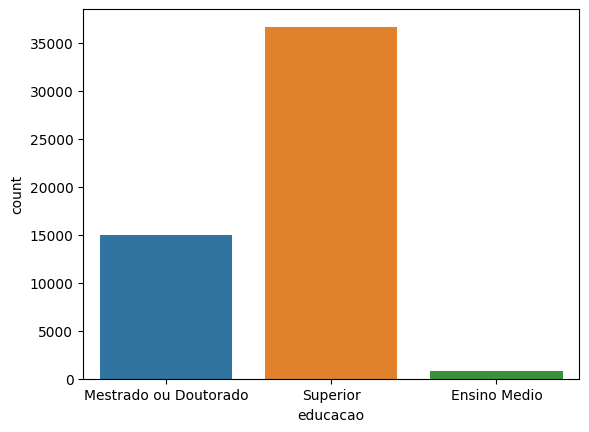

In [26]:
#Visualização gráfica da mesma situação acima
sns.countplot(x=dadosRH['educacao'])


In [28]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


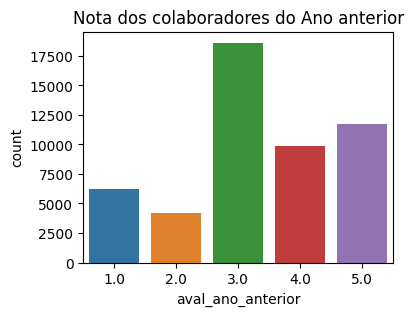

In [34]:
plt.figure(figsize=(4,3))
sns.countplot(x=dadosRH['aval_ano_anterior'])
plt.title("Nota dos colaboradores do Ano anterior")

### Vamos aplicar técnica de Data Wrangling com imputação e preencher os valores ausentes.

In [39]:
#Como a  feature "educacao" é categorica, substitui pela Moda.
dadosRH['educacao']\
    .fillna(dadosRH['educacao']
    .mode()[0], 
    inplace = True)

In [76]:
#Como a  feature "educacao" é categorica, substitui pela Mediana.
dadosRH['aval_ano_anterior']\
    .fillna(dadosRH['aval_ano_anterior']
    .median(), 
    inplace = True)

In [70]:
#Verificando se os valores foram preenchidos, e não existe mais nulos.
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [73]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [47]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


Vamos verificar o balanceamento de classe na variável "promovido".

In [48]:
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


<AxesSubplot: xlabel='promovido', ylabel='count'>

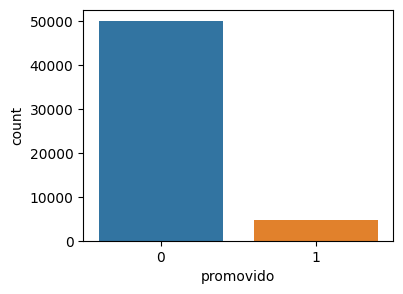

In [75]:
plt.figure(figsize=(4,3))
sns.countplot(x=dadosRH['promovido'])

In [50]:
df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [51]:
df_classe_majoritaria.shape

(50140, 11)

In [52]:
df_classe_minoritaria.shape

(4668, 11)

In [53]:
# Upsample da classe minoritária
from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria, 
                                           replace = True,     
                                           n_samples = 50140,   
                                           random_state = 150) 

In [54]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsampled])

In [55]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [56]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


<AxesSubplot: ylabel='count'>

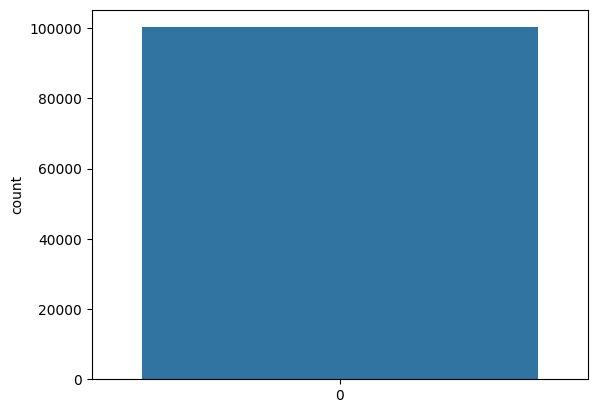

In [57]:
sns.countplot(dadosRH_balanceados['promovido'])

Os dados estão balanceados. Vamos salvar o dataset com os dados manipulados.

In [58]:
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding = 'utf-8', index = False)

Agora carregamos os dados e seguimos com o trabalho de análise.

> A partir daqui executaremos também no Power BI.

In [59]:
dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [60]:
dataset.shape

(100280, 11)

### Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?

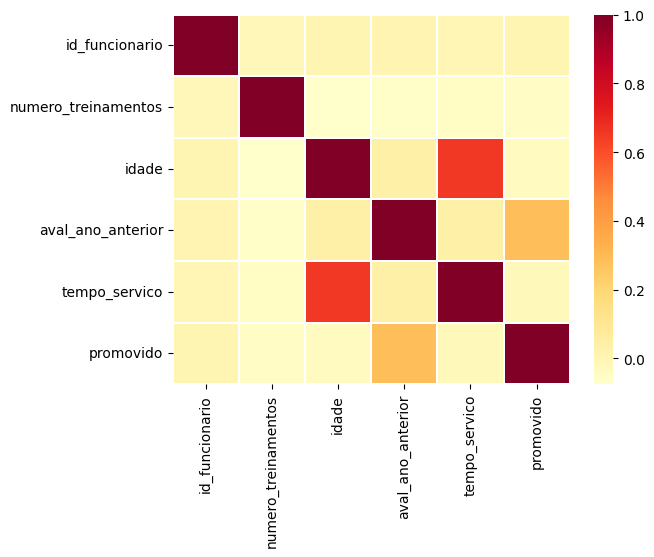

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()

### Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9924\2905182933.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['tempo_servico'], color = 'green')


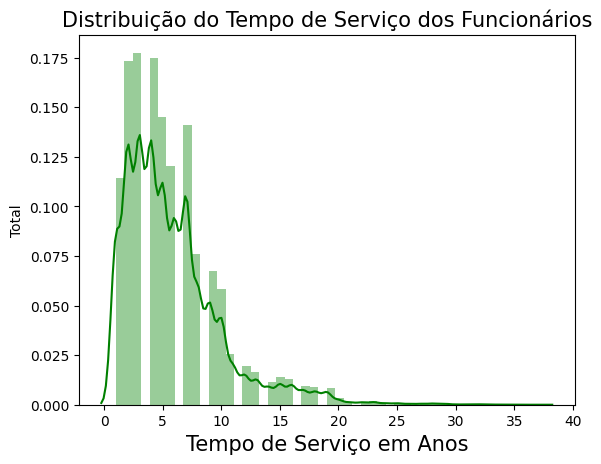

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'], color = 'green')
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize = 15)
plt.xlabel('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel('Total')
plt.show()

### Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?

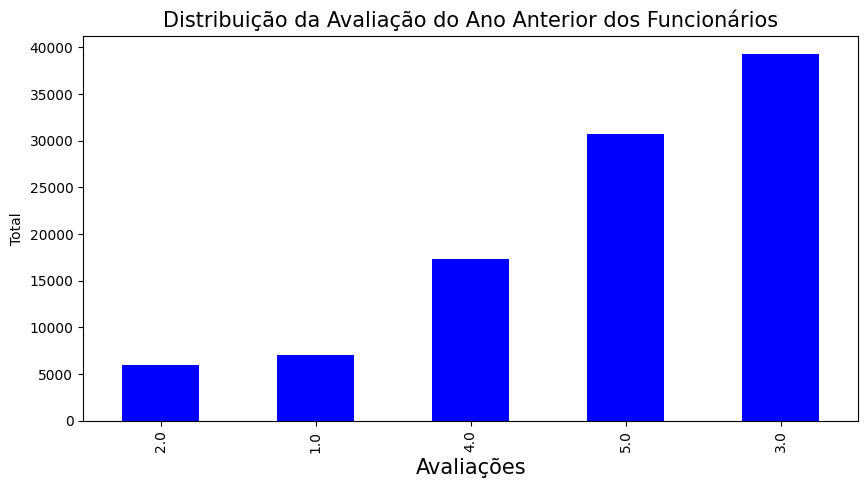

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'blue', figsize = (10, 5))
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15)
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total')
plt.show()

### Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9924\3415725328.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['idade'], color = 'magenta')


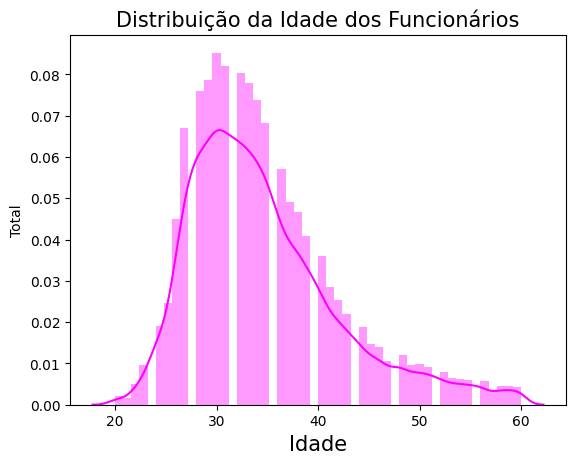

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color = 'magenta')
plt.title('Distribuição da Idade dos Funcionários', fontsize = 15)
plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Total')
plt.show()

### Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?

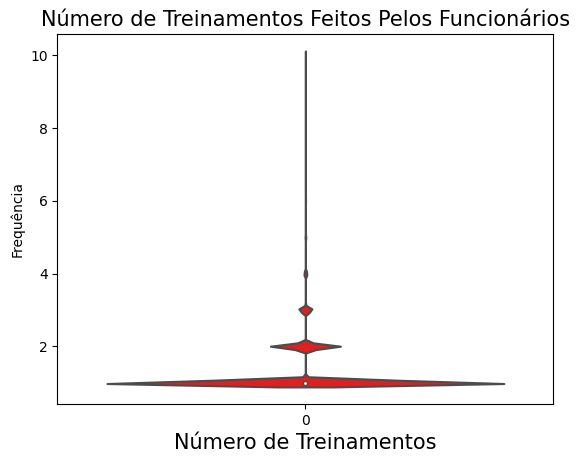

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color = 'red')
plt.title('Número de Treinamentos Feitos Pelos Funcionários', fontsize = 15)
plt.xlabel('Número de Treinamentos', fontsize = 15)
plt.ylabel('Frequência')
plt.show()

### Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?

In [66]:
dataset['canal_recrutamento'].value_counts()

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

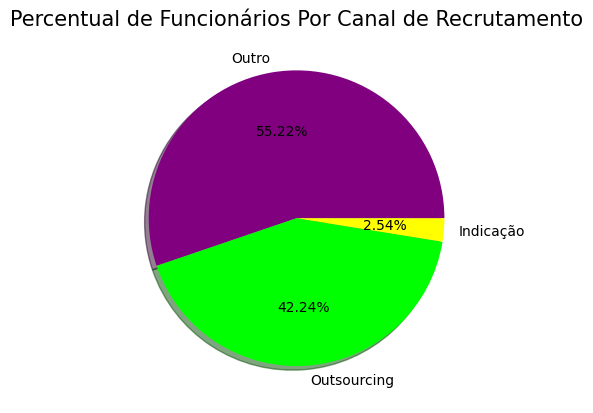

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [55375, 42358, 2547]
labels = "Outro", "Outsourcing", "Indicação"
colors = ['purple', 'lime', 'yellow']
explode = [0, 0, 0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Percentual de Funcionários Por Canal de Recrutamento', fontsize = 15)
plt.axis('off')
#plt.legend()
plt.show()

### Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

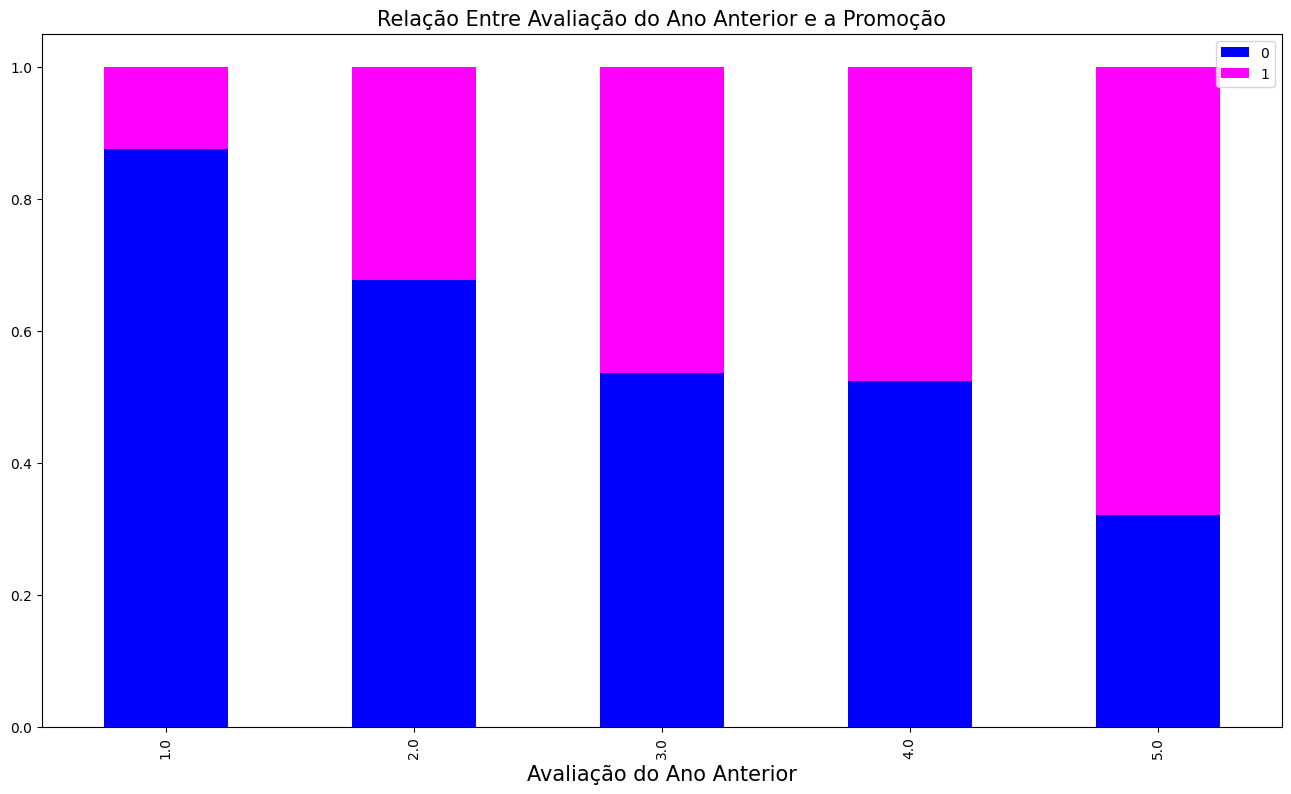

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (16, 9), 
                                                   color = ['blue', 'magenta'])
plt.title('Relação Entre Avaliação do Ano Anterior e a Promoção', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()

# Fim